In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import sklearn

Q1: Import “Cars prices” .csv file into your notebook and read it by Pandas python library.

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')

Q2: Drop rows with NaN entries.

In [3]:
data.dropna(inplace=True)

Q3: Is this supervised or unsupervised learning? Why? PDF

Q4: Plot whole features with Pandas.DataFrame.plot function.

<AxesSubplot:xlabel='car_ID'>

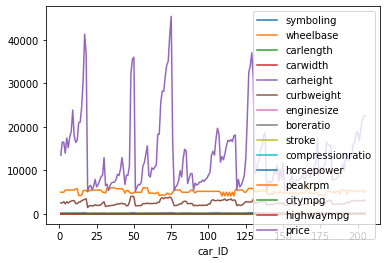

In [4]:
data.plot(x='car_ID')

Q5: Write a short description about dataset distribution. PDF

In [5]:
# data.drop(columns=['car_ID']).plot(x='price')
# data.describe()
data.std()/data.mean()

car_ID              0.575947
symboling           1.492912
wheelbase           0.060976
carlength           0.070884
carwidth            0.032549
carheight           0.045482
curbweight          0.203744
enginesize          0.328135
boreratio           0.081340
stroke              0.096331
compressionratio    0.391622
horsepower          0.379805
peakrpm             0.093068
citympg             0.259408
highwaympg          0.223940
price               0.601719
dtype: float64

Q6: Sperate engine size and price features in a new Dataframe.

In [6]:
engine_price = data[['enginesize', 'price']]
engine_price.describe()

,enginesize,price
count,205.000000,205.000000
mean,126.907317,13276.710571
std,41.642693,7988.852332
min,61.000000,5118.000000
25%,97.000000,7788.000000
50%,120.000000,10295.000000
75%,141.000000,16503.000000
max,326.000000,45400.000000


Q7: Calculate linear regression between engine size and price features with Gradient descent method. ( Use SKlearn library )

In [7]:
from sklearn import model_selection

y = np.array(engine_price['price'])
X = np.array([engine_price['enginesize']]).T

X_train, X_test, y_train, y_test = model_selection.train_test_split(
	X, y,
	train_size=0.8,
	test_size=0.2,
	random_state=101
)

In [8]:
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# reg = LinearRegression()
reg_inner = SGDRegressor(max_iter=1000, tol=1e-3)
reg = make_pipeline(StandardScaler(), reg_inner)

reg.fit(X_train, y_train)

print("parameters:", reg_inner.coef_)
print("score on train:", reg.score(X_train, y_train))

parameters: [7226.5981685]
score on train: 0.756323577488873


Q8: After creating your model, test it with 20% of data.

score on test: 0.7704142907520422


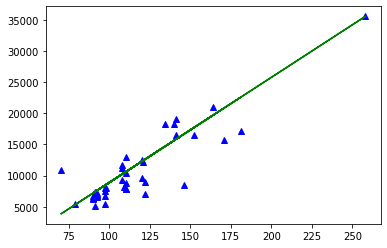

In [9]:
print("score on test:", reg.score(X_test, y_test))

y_test_predict = reg.predict(X_test)

plt.plot(X_test, y_test, 'b^')  # red is actual data
plt.plot(X_test, y_test_predict, 'g')  # red is actual data

Q9: Plot engine size and price features with regression line (Scatter plot).

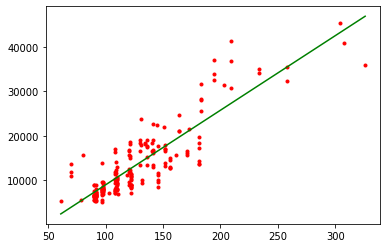

In [10]:
plt.plot(X, y, 'r.')  # red is actual data

line_x = np.array([[X.min()], [X.max()]])
line_y = reg.predict(line_x)
plt.plot(line_x, line_y, 'g')  # green is line on regression coefs

Q10: How much is this model accurate ( Use SKlearn library )

In [11]:
score = reg.score(X, y)
print(f"score on all: {score * 100}%")


score on all: 76.368979132108%


Q11: Write a sample function that get engine size and returns predicted price of car.

In [12]:
def query_price(engine_size):
	return int(reg.predict([[engine_size]])[0])


print("EngSize=50 : ", query_price(50))
print("EngSize=100 : ", query_price(100))
print("EngSize=150 : ", query_price(150))
print("EngSize=200 : ", query_price(200))
print("EngSize=250 : ", query_price(250))
print("EngSize=300 : ", query_price(300))
print("EngSize=350 : ", query_price(350))

EngSize=50 :  485
EngSize=100 :  8908
EngSize=150 :  17330
EngSize=200 :  25753
EngSize=250 :  34176
EngSize=300 :  42598
EngSize=350 :  51021
